              precision    recall  f1-score   support

           0       0.88      0.90      0.89        58
           1       0.71      0.68      0.70        22

    accuracy                           0.84        80
   macro avg       0.80      0.79      0.79        80
weighted avg       0.84      0.84      0.84        80

83.75


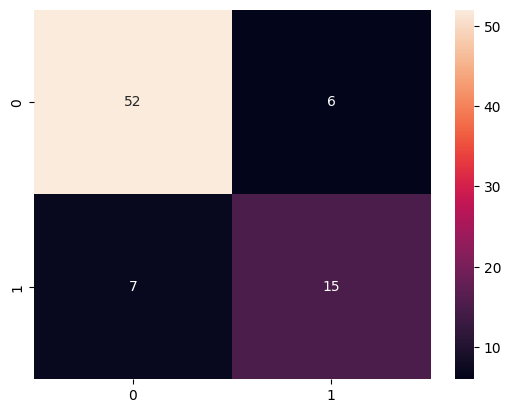

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

dataset = pd.read_csv('Social_Network_Ads.csv')
x = dataset.iloc[:, [1, 2, 3]].values
y = dataset.iloc[:, -1].values

le = LabelEncoder()
x[:,0] = le.fit_transform(x[:,0])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.savefig('confusion.png')

ac = accuracy_score(y_test, y_pred) * 100
print(ac)